Este Notebook vamos a relaizar un <span style="color:green">ANALISIS EXPLORATORIO DE DATOS, </span> de el archivo ***aust_users_reviews*** que previamente se le hizo un **ETL** en el cual se desanido los objetos JSON y se elimenaron algunas culumnas las cuales no eran necesarias para el analisis.

Cargamos los datos en un dataFrame.

In [1]:
### Importamos las librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Carga de datos
df_reviews = pd.read_csv('./aust_user_reviews.csv')




C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_4460\3217780169.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Revisamos la informacion y las columnas del DataFrane

In [2]:
df_reviews.info()
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             25799 non-null  object 
 1   item_id             25799 non-null  object 
 2   recommend           25799 non-null  object 
 3   review_content      25787 non-null  object 
 4   year                25799 non-null  float64
 5   sentiment_analysis  25799 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


,user_id,item_id,recommend,review_content,year,sentiment_analysis
0,Bennysaputra,10.0,True,cool game,2015.0,0
1,Monsta45,10.0,True,wallbang simulator,2015.0,1
2,76561198072207162,10.0,True,people still play this! siq game,2014.0,0
3,Monsta45,10.0,True,wallbang simulator,2015.0,1
4,shaman3soul3,10.0,True,please put australian servers in cs 1.6 (espea...,2015.0,2


podemos notar que la columna ***year*** tiene los años con punto decimal lo cual puede dificultar su correcta visualizacion asi que procedemos a convertirlos a ***int***

In [3]:
df_reviews['year'] = df_reviews['year'].astype(int)
df_reviews.to_csv('aust_user_reviews.csv', index=False)

Revisamos la distribucion de sentiumientos en la columna ***sentiment_analysis*** la cual esta distribuida en:   ***0*** positiva ***1*** neutral  ***2*** positivo

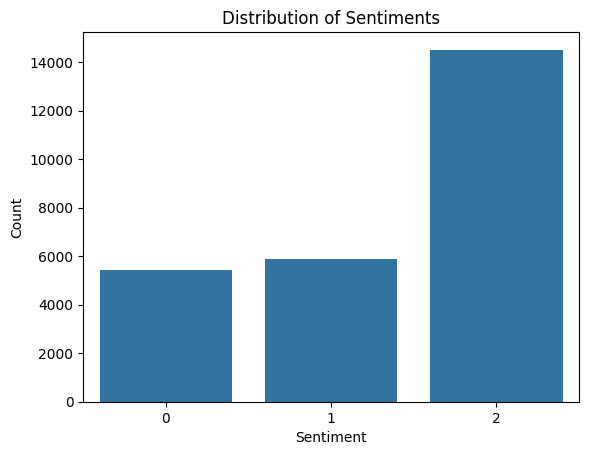

In [4]:
# Conteo de valores en la columna 'sentiment_analysis'
sentiment_counts = df_reviews['sentiment_analysis'].value_counts()

# Gráfico de barras para la distribución de sentimientos
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

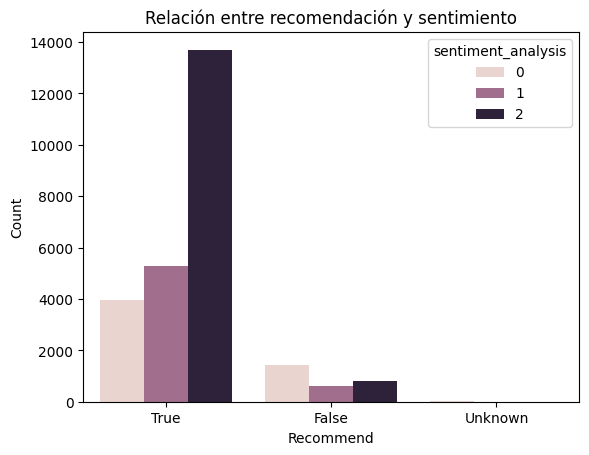

In [5]:
# Relación entre recomendación y sentimiento
sns.countplot(x='recommend', hue='sentiment_analysis', data=df_reviews)
plt.xlabel('Recommend')
plt.ylabel('Count')
plt.title('Relación entre recomendación y sentimiento')
plt.show()


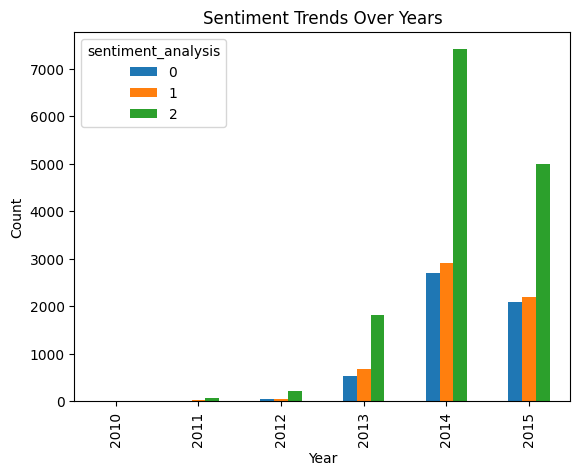

In [6]:
# Tendencias de sentimientos a lo largo de los años
sentiment_year = df_reviews.groupby(['year', 'sentiment_analysis']).size().unstack()
sentiment_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sentiment Trends Over Years')
plt.show()


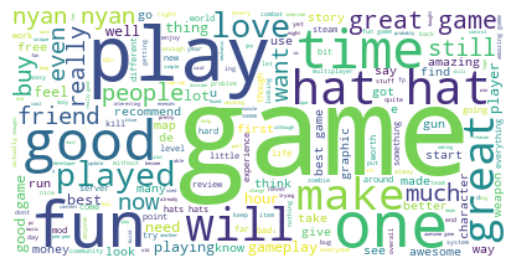

In [7]:
from wordcloud import WordCloud

# Generación de una nube de palabras para 'review_content'
text = ' '.join(review for review in df_reviews['review_content'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)

# Visualización de la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


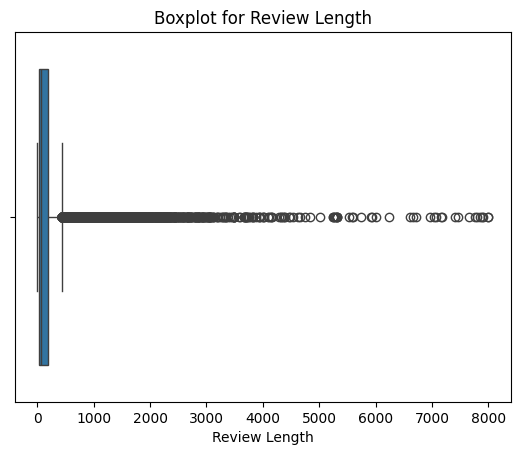

In [23]:
# Identificación de outliers en las longitudes de las reseñas
df_reviews['review_length'] = df_reviews['review_content'].str.len()
sns.boxplot(x=df_reviews['review_length'])
plt.xlabel('Review Length')
plt.title('Boxplot for Review Length')
plt.show()
